# Assignment 2 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Logistic Regression`.


## Instructions
- Do not Use Direct Inbuilt functions for the Task.
- Numpy or other math libraries are allowed.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not change the contents of the Given cells. Use new cells to Write your code.


Name: Aum Alok Khatlawala <br>
Roll Number: 2020113008

### Dataset

Use the code below to load the Dataset


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_blobs
X, y =  make_blobs(n_samples=100, centers=[[2,4],[4,2]], random_state=20)

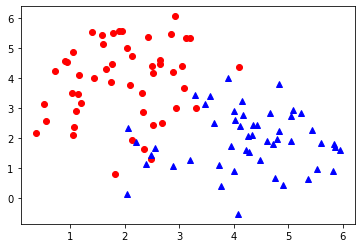

In [4]:
#Visualize dataset 
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')
# print(X)

Write your code below for logistic regression with Gradient Descent and plot the decision boundary.<br>
Sample output is given in the file `LogisticRegression_sample_result.png`

[-0.12937838  1.20491306 -1.20320284]
-0.10752832156458736 1.0014213936112146


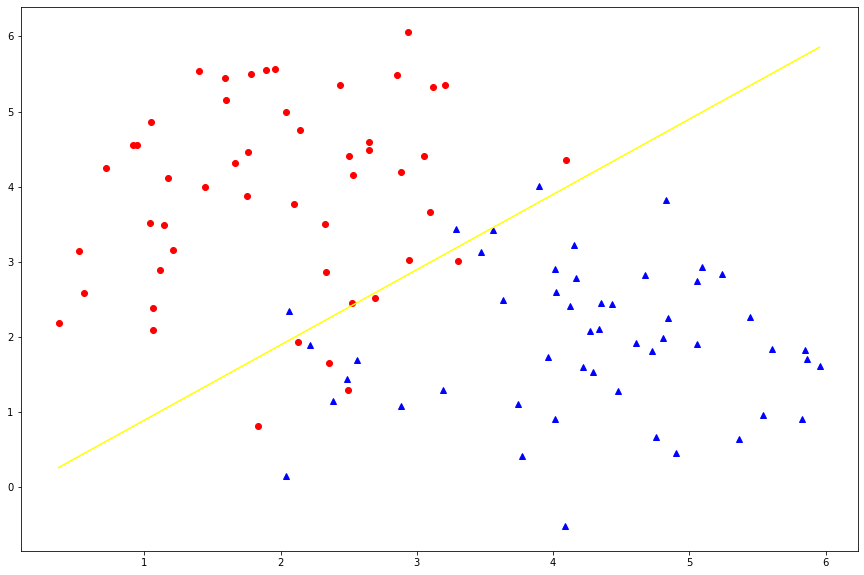

In [6]:
learning_rate = 0.01
iters = 1000

if X[0].size == 2:
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

weights = np.zeros(X.shape[1])

for i in range(iters):
    z = np.dot(X, weights)
    # computing the sigmoid of z
    y_pred = 1 / (1 + np.exp(-z))
    
    # computing gradient descent
    gradient = np.dot(X.T, (y_pred - y)) / y.size
    weights = weights - (learning_rate * gradient)

print(weights)
c = -weights[0] / weights[2]
m = -weights[1] / weights[2]
x_start = X[:, 1].min()
x_end = X[:, 1].max()
x_arr = np.linspace(x_start, x_end, 100)
y_arr = c + m * x_arr
print(c, m)
plt.figure(figsize=(15, 10))
plt.plot(X[:,1][y==0],X[:,2][y==0],'o',color='red')
plt.plot(X[:,1][y==1],X[:,2][y==1],'^',color='blue')
plt.plot(x_arr, y_arr, color='yellow')
plt.show()

### Questions

1) Explain the approach of Logistic Regression.<br>
2) What is the loss function used?<br>
3) Explain if we can use Mean Square Error(MSE) as Loss function.

#### 1) Explain the approach of Logistic Regression.
Logistic regression is a binary classification algorithm used to assign observations to a discrete set of classes. It can e generalised to multiclass classification too. It is the process of modeling the probability of a discrete outcome (class) given an input variable.
A cost / loss function helps us understand how much the model prediction varies from the actual value of output.
Essentially, in every iteration, we compute the predicted y value using the sigmoid function and appplying it on the dot product of X (input) and weights. After this, we compute the gradient by taking dot prduct of X with the loss and normalising it. Then, we update weights using the learning rate and the gradient to get the gradient descent. We repeat this for n iterations.

#### 2) What is the loss function used?
The loss function used is log loss function / cross-entropy loss function which is used to measure the loss of a function whose output is between 0 and 1. The higher the deviation from label is, the higher the value of the log loss. The derivative of the log loss is used in the calculation of gradient descent.

#### 3) Explain if we can use Mean Square Error(MSE) as Loss function.
No, we can not because it is not a convex function due to the presence of local minima. Thus, the gradient descent will not be able to find the global minima.